# Pymaceuticals Inc.
---

### Analysis


1. There are ten drug regimens, including a placebo.
2. The data includes statistics on tumor volume: mean, median, variance, standard deviation (std. dev.), and standard error (std. err.).Data on maximum tumor volumes for a selected number of treatments and correlations between weight and tumor size for one type of treatment. 

### Insights:

**Mean Tumor Volume**

-    **Capomulin** and **Ramicane** appear to be the most effective treatments in terms of lowering mean tumor volume, with values close to 40.

-    Drugs like **Ketapril** and **Naftisol** have the highest mean tumor volume, indicating they might be less effective or even detrimental.

**Variability**

-    the results for **Ketapril**, **Naftisol**, and the **Placebo** are quite varied. This could mean that the treatment response is inconsistent among subjects.

-    **Capomulin** and **Ramicane** have the lowest tumor volume variance and std. dev., indicating consistent results among subjects for these treatments.

**Accuracy of the Mean**

-   **Capomulin** and **Ramicane** have the lowest std. err. values, reinforcing their reliability.

-   **Ketapril** has the highest std. err., making its mean tumor volume less reliable as a representation of the entire population.

-   Some drugs like **Ketapril** and **Naftisol** have mean tumor volumes that are greater than the placebo, suggesting they might not be effective or could even exacerbate tumor growth.

-   **Capomulin** and **Ramicane**, with much lower mean tumor volumes than the placebo, demonstrate potential effectiveness.

**Analysis of Maximum Tumor Volume**

- **Capomulin** and **Ramicane** consistently exhibit lower median maximum tumor volumes compared to **Infubinol** and **Ceftamin**. This indicates a potential superior efficacy of Capomulin and Ramicane, warranting deeper analysis and additional testing. However, it's crucial to highlight that greater variability was detected in the maximum volumes associated with these two treatments compared to the others. This variability underscores the importance of further investigations and experimentation.

**Correlation between Weight and Mean Tumor Volume (for mice treated with Capomulin)**

- A pronounced correlation (0.84) is observed between weight and tumor volume for mice under the Capomulin regimen. This relationship merits deeper exploration across other treatments and placebos. 

### Conclusions:

- **Capomulin** and **Ramicane** emerge as the most promising treatments based on the provided statistics, demonstrating both lower mean and median tumor volumes and consistent results across subjects.
- Drugs like **Ketapril** and **Naftisol** might be less effective, as their mean and median tumor volumes are high and even surpass the placebo's values in some cases.
- Extending the study with more extensive samples could illuminate the potential role of **weight management** in influencing tumor volume reduction.


 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
unique_mouse = merged_df['Mouse ID'].nunique()
unique_mouse

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#Use duplicated() to filter the df by rows that are duplicated to return the 'erroneous' mouse ID
duplicate_mouse_id = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mouse_id                                                                                                 

array(['g989'], dtype=object)

In [6]:
#generate clean df 
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
#display number of mice left in clean df
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
#establish dataframe i'll be working with

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [51]:
clean_df.loc[clean_df['Mouse ID'] == 'c326']

In [9]:
# calculate statistics 
mean_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()




In [10]:
summary_stats = pd.concat([mean_tumor_volume, median, variance, std, sem], axis=1)
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumore Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumore Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_df = clean_df.groupby(['Drug Regimen'])['Timepoint'].count().to_frame()
grouped_df = grouped_df.sort_values(['Timepoint'], ascending=False)
grouped_df

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


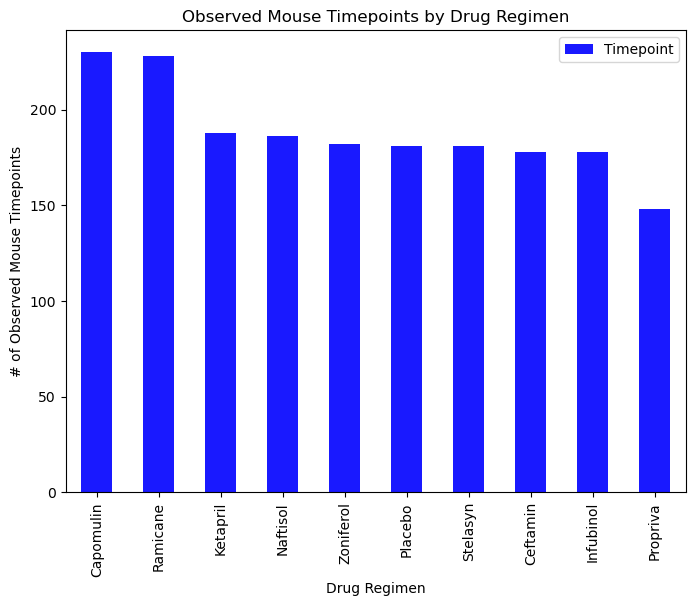

In [13]:
bar_chart = grouped_df.plot(kind='bar', color='b', alpha=0.90, figsize=(8,6), title='Observed Mouse Timepoints by Drug Regimen')
bar_chart.set_xlabel('Drug Regimen')
bar_chart.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

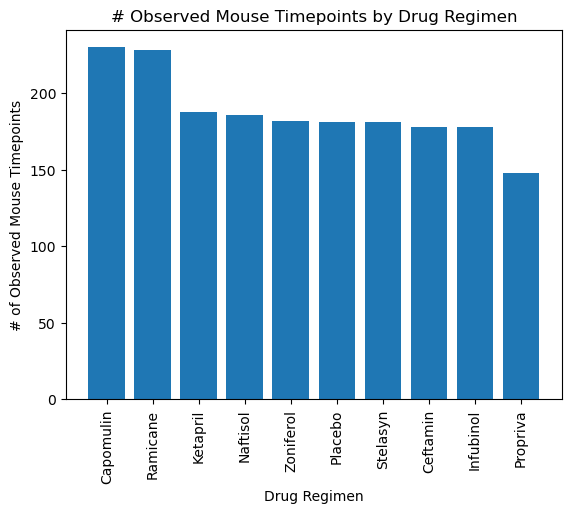

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = grouped_df.index
y_axis = grouped_df.iloc[:, 0]
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('# Observed Mouse Timepoints by Drug Regimen')
plt.show()

<Axes: title={'center': 'Distribution of Females Vs Male Mice using Pandas'}, ylabel='Sex'>

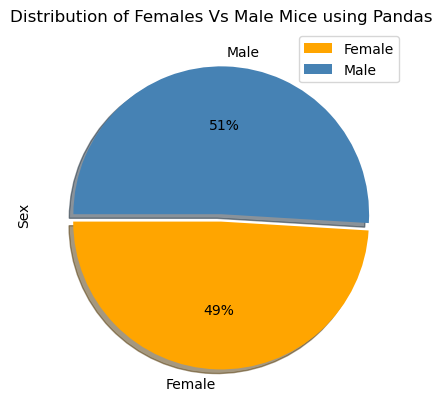

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_df.groupby(['Sex'])['Sex'].count()
gender_df = pd.DataFrame(gender_df)
renamed_df = gender_df.rename(columns={'Sex':'Total'}, index={'Sex':'Gender'}).sort_values('Total', ascending=False)


explode = (0.05, 0)
gender_pie = gender_df.plot(kind='pie', y='Sex', autopct='%1.0f%%', colors=['orange', 'steelblue'], 
                            explode=explode, shadow=True, startangle=180, title=("Distribution of Females Vs Male Mice using Pandas"))

gender_pie

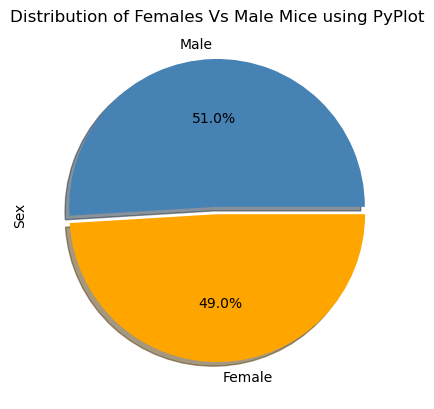

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = renamed_df.index[0:2]
values = renamed_df['Total']
explode = (0.05, 0)
colors = ['steelblue', 'orange']
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.ylabel('Sex')
plt.title("Distribution of Females Vs Male Mice using PyPlot")
plt.show()
# renamed_df.sort_values('Total', ascending=False)

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max().to_frame().reset_index()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = max_timepoint.merge(clean_df)
merged


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
      # Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    s = merged.loc[merged['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    vol_data.append(s)
    
    # Determine outliers using upper and lower bounds
    quartiles = s.quantile([.25, .5, .75])
    # print(quartiles)
    iqr = quartiles[.75] - quartiles[.25]
    u = quartiles[.75] + iqr*1.5
    l = quartiles[.25] - iqr*1.5
    
    for x in s: 
        
        if x > u or x < l:
            print(f'{treatment} has outliers')
            outlier_mouse = merged.loc[merged['Tumor Volume (mm3)'] == x]['Mouse ID']
           

Infubinol has outliers


In [48]:
outlier_mouse

31    c326
Name: Mouse ID, dtype: object

In [49]:
merged.loc[merged['Mouse ID'] == 'c326']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
29,c326,0,45.000000,0,Infubinol,Female,18,25
420,c326,5,36.321346,0,Infubinol,Female,18,25


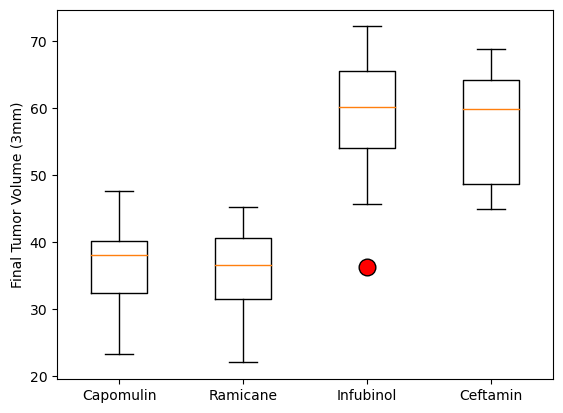

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(vol_data, labels=treatments,flierprops=dict(markersize=12, markerfacecolor='r', markeredgecolor='black'))
plt.ylabel('Final Tumor Volume (3mm)')

plt.show()


## Line and Scatter Plots

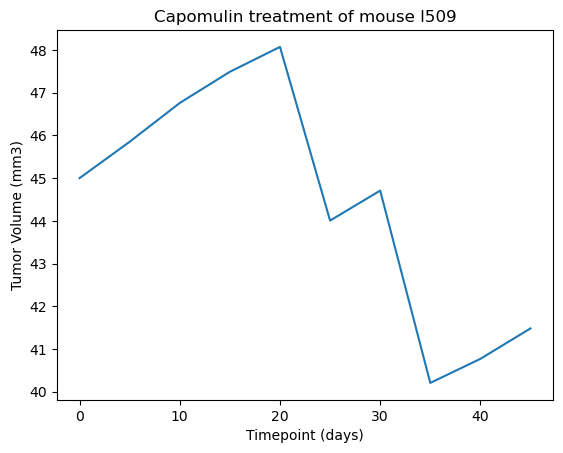

In [77]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


timepoint_sgl = clean_df.loc[clean_df['Mouse ID'] == 'l509']['Timepoint']
tumor_vol_sgl = clean_df.loc[clean_df['Mouse ID'] == 'l509']['Tumor Volume (mm3)']
plot_sgl = plt.plot(timepoint_sgl, tumor_vol_sgl)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

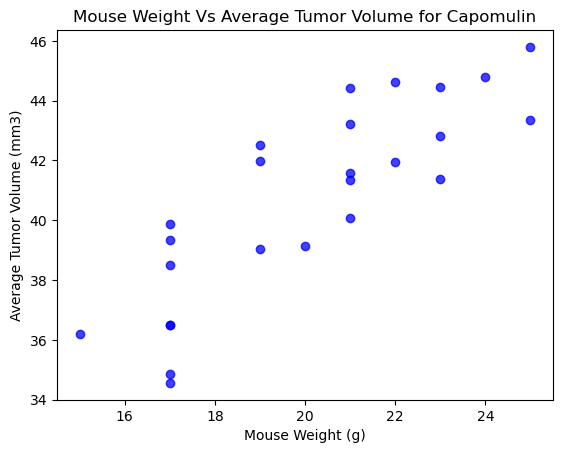

In [79]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_raw = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
weight = capomulin_raw.groupby(['Mouse ID'])['Weight (g)'].mean()
average_tumor_vol = capomulin_raw.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
plt.title('Mouse Weight Vs Average Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(weight, average_tumor_vol, marker='o', facecolors='b', alpha=0.75)

In [80]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Correlation and Regression

In [81]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight, average_tumor_vol)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

The correlation between mouse weight and the average tumor volume is 0.84


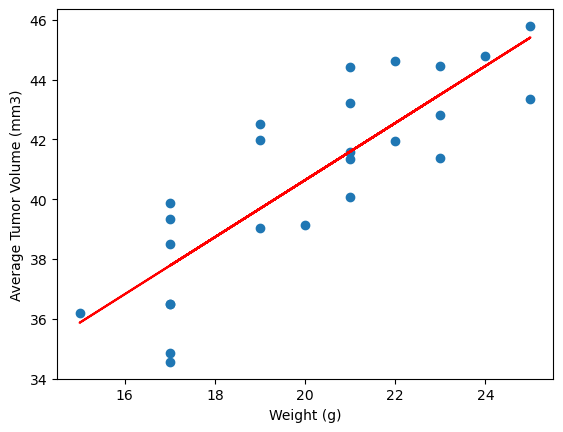

In [82]:
#plot linear regression model
x_values = weight
y_values = average_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [471]:
#Exporting dataframes for further analysis with excel
summary_stats.to_excel('data/summary_stats.xlsx')

In [472]:
clean_df.to_excel('data/clean_df.xlsx')